# 데이터분석과 기계학습
## 프로젝트 2차 
### 201804235 이현중

* 데이터셋 설명
---
-> 넷플릭스 추천 알고리즘을 개선하기 위해 준비된 데이터 입니다.

-> 1890년부토 2005년까지의 영화의 id, 제목, 개봉년도와 사용자의 id, 평점에 대한 데이터 입니다.

---

->  Netflix 스트리밍에서 사용할 수 있는 모든 프로그램을 나열하고 흥미로운 사실을 찾기 위해 데이터를 분석하기 위해 생성되었습니다.

-> 영화의 제목, show or movie, 출시년도, 연령 인증, 장르, 제작한 국가 등의 다양한 넷플릭스 영상의 정보 데이터 입니다.

---

* 주제
---
-> 영화 평점에 미치는 다양한 변수 확인 및 다양한 분석 시도


# 1. 라이브러리 불러오기 및 데이터 확인

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import matplotlib.pyplot as plt


#Data Vis
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## 평점 데이터

#### 평점 데이터

In [4]:
df1 = pd.read_csv('data/평점/combined_data_1.txt')

In [5]:
df1

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03
...,...,...
2591364,2.0,2005-02-16
1791000,2.0,2005-02-10
512536,5.0,2005-07-27
988963,3.0,2005-12-20


In [6]:
df1 = pd.read_csv('data/평점/combined_data_1.txt', names = ['Movie_id','Rating', 'Date'], usecols = [0,1,2])

In [7]:
df1   

,Movie_id,Rating,Date
0,1:,NaN,NaN
1,1488844,3.0,2005-09-06
2,822109,5.0,2005-05-13
3,885013,4.0,2005-10-19
4,30878,4.0,2005-12-26
...,...,...,...
24058258,2591364,2.0,2005-02-16
24058259,1791000,2.0,2005-02-10
24058260,512536,5.0,2005-07-27
24058261,988963,3.0,2005-12-20


분석할수 없는 데이터 형식이다. movie_id열에 영화 번호와 user_id 번호가 함께 나와있다.
영화 번호를 다른 열로 빼는 전처리 진행해야 한다.

#### 제목 데이터

In [8]:
df_title = pd.read_csv('data/평점/movie_titles.csv', encoding = "ISO-8859-1", names = ['Movie_Id', 'Year', 'Name'],usecols = [0,1,2])

## 넷플릭스 데이터

In [9]:
# 영화 정보 - 넷플릭스 
df_credits = pd.read_csv('data/credits/credits.csv')
df_t = pd.read_csv('data/credits/titles.csv')

#### df_t의 컬럼 설명
id: JustWatch의 타이틀 ID입니다.

title: 제목의 이름입니다.

show_type: TV 쇼 또는 영화.

description: 간략한 설명입니다.

release_year: 출시 연도입니다.

age_certification: 연령 인증입니다.

TV-MA - 17세 미만의 어린이 혹은 청소년한테 부적절한 프로그램
R     - 일반적 성인영화.
TV-14 - 14세 미만의 어린이 혹은 청소년이 시청하려면 보호자 지도가 권장되는 프로그램
PG-13 - 전체 관람가지만, 부모의 주의가 요구되며 13세 미만에게는 보호자 동반이 권고된다
PG    - 전체 관람가지만, 폭력성이 존재
TV-PG - 어린이가 시청하려면 보호자 지도가 권장되는 프로그램
G     - 전체 관람가
TV-Y7 - 7세 이상의 어린이를 위한 프로그램
TV-Y  - 영유아를 위한 프로그램
TV-G  - 모든 연령이 시청할 수 있는 프로그램. 다만 어린이를 대상으로 하지는 않았다.
NC-17 - 수위가 매우 높은 성인영화. +18

runtime: 에피소드(SHOW) 또는 영화의 길이입니다.

genres: 장르 목록입니다.

Production_countries: 타이틀을 제작한 국가 목록입니다.

Seasons: SHOW인 경우 시즌 수입니다.

In [10]:
df_t.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [11]:
df_t

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [12]:
df_t = df_t[['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries', 'imdb_score']]

#### df_credits

person_ID: JustWatch의 개인 ID입니다.

id: JustWatch의 타이틀 ID입니다.

name: 배우 또는 감독의 이름.

character_name: 캐릭터 이름입니다.

rolr: ACTOR 또는 DIRECTOR.

여러 국가에서 사용할 수 있는 콘텐츠 이해.
텍스트 기반 기능을 일치시켜 유사한 콘텐츠 식별.
Actor / Director의 네트워크 분석 및 흥미로운 통찰력 찾기.
Netflix는 최근 몇 년 동안 영화보다 TV 쇼에 더 중점을 둡니다.

In [13]:
df_credits

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...
77796,736339,tm1059008,Adelaida Buscato,María Paz,ACTOR
77797,399499,tm1059008,Luz Stella Luengas,Karen Bayona,ACTOR
77798,373198,tm1059008,Inés Prieto,Fanny,ACTOR
77799,378132,tm1059008,Isabel Gaona,Cacica,ACTOR


In [14]:
df_t

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],8.2
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],7.7
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],8.2
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",7.7
...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],6.8
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],7.7
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],3.8
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN


# 2. 전처리

#### 평점 데이터 1,2,3,4 분석 가능하게 합치기

In [6]:
%%time
## coiuld replace with pd.read_csv and dropping NaNs/ : cols ? 

# DataFrame to store all imported data
if not os.path.isfile('data.csv'):
    data = open('data.csv', mode='w')

files = ['data/평점/combined_data_1.txt',
         'data/평점/combined_data_2.txt',
          'data/평점/combined_data_3.txt', 
          'data/평점/combined_data_4.txt']

# Remove the line with movie_id: and add a new column of movie_id
# Combine all data files into a csv file
for file in files:
  print("Opening file: {}".format(file))
  with open(file) as f:
    for line in f:
        line = line.strip()
        if line.endswith(':'):
            movie_id = line.replace(':', '')
        else:
            data.write(movie_id + ',' + line)
            data.write('\n')
data.close()

Opening file: data/평점/combined_data_1.txt
Opening file: data/평점/combined_data_2.txt
Opening file: data/평점/combined_data_3.txt
Opening file: data/평점/combined_data_4.txt
CPU times: total: 1min 28s
Wall time: 1min 28s


In [15]:
# Read all data into a pd dataframe
df = pd.read_csv('data.csv', names=['Movie_Id', 'user_id','rating','date'])
print(df.nunique())
df

Movie_Id     17770
user_id     480189
rating           5
date          2182
dtype: int64


,Movie_Id,user_id,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03
...,...,...,...,...
100480502,17770,1790158,4,2005-11-01
100480503,17770,1608708,3,2005-07-19
100480504,17770,234275,1,2004-08-07
100480505,17770,255278,4,2004-05-28


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Movie_Id  int64 
 1   user_id   int64 
 2   rating    int64 
 3   date      object
dtypes: int64(3), object(1)
memory usage: 3.0+ GB


In [17]:
df.isna().sum()

Movie_Id    0
user_id     0
rating      0
date        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Movie_Id  int64 
 1   user_id   int64 
 2   rating    int64 
 3   date      object
dtypes: int64(3), object(1)
memory usage: 3.0+ GB


## 평점 데이터

#### 영화별 평점 몇개인지 

In [19]:
from collections import Counter

b = df['Movie_Id'].tolist()

counter = Counter(b)

counter = [dict(counter)]

counter = pd.DataFrame(counter)

counter = counter.T.reset_index()

counter_movie = counter.rename(columns = {'index':'Movie_Id', 0:'Movie_count'})

In [20]:
counter_movie

,Movie_Id,Movie_count
0,1,547
1,2,145
2,3,2012
3,4,142
4,5,1140
...,...,...
17765,17766,605
17766,17767,204
17767,17768,1362
17768,17769,6749


#### 영화별 평균 평점

In [21]:
rating_mean = df.groupby('Movie_Id').mean().sort_values('rating').reset_index()[['Movie_Id', 'rating']]

In [22]:
rating_mean

,Movie_Id,rating
0,515,1.287879
1,16487,1.346021
2,11768,1.375610
3,17429,1.396761
4,3575,1.400000
...,...,...
17765,9864,4.638809
17766,3456,4.670989
17767,7057,4.702611
17768,7230,4.716611


In [23]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [24]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Movie_Id  17770 non-null  int64  
 1   Year      17763 non-null  float64
 2   Name      17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


---

#### 평점 데이터 - 사람기준 평점을 몇개 남겼는지 - 미정
-> 데이터가 너무 커져 실행에 문제가 생김, 또한 user_id를 기준으로 할 시 넷플릭스 데이터와 병합에 문제가 있음

In [25]:
a = df['user_id'].tolist()

In [469]:
from collections import Counter

In [470]:
counter = Counter(a)

In [ ]:
counter = [dict(counter)]

In [ ]:
counter = pd.DataFrame(counter)

In [ ]:
counter = counter.T.reset_index()

In [ ]:
counter = counter.rename(columns = {'index':'user_id', 0:'user_count'})

In [ ]:
user = df.groupby("user_id").mean().reset_index().sort_values('user_id')

In [ ]:
user = pd.merge(user, counter, how='inner', on=None)

In [ ]:
user = user[['user_id', 'user_count']]

In [ ]:
user

In [ ]:
aa = pd.merge(df, counter, how='inner', on=None)

In [ ]:
aa

#### 미정

In [ ]:
movie2 = pd.merge(Movie_Id, movie_N, how='inner', on=None)

In [ ]:
Movie_Id = movie[["Movie_Id","rating", "Year", "Name"]]

In [ ]:
Movie_Id = Movie_Id.groupby('Name').mean()

In [ ]:
user_id = movie[["user_id","rating", "user_count", "Year", "Name"]]

In [ ]:
user_id

---

#### rating_mean 제목과 평점 합치기

In [26]:
movie = pd.merge(rating_mean, df_title, how='inner', on=None)

In [27]:
movie = pd.merge(movie, counter_movie, how='inner', on=None)

In [28]:
movie.isna().sum()

Movie_Id       0
rating         0
Year           7
Name           0
Movie_count    0
dtype: int64

In [29]:
movie

,Movie_Id,rating,Year,Name,Movie_count
0,515,1.287879,2005.0,Avia Vampire Hunter,132
1,16487,1.346021,2004.0,Zodiac Killer,289
2,11768,1.375610,2004.0,Alone in a Haunted House,205
3,17429,1.396761,2005.0,Vampire Assassins,247
4,3575,1.400000,2005.0,The Worst Horror Movie Ever Made,165
...,...,...,...,...,...
17765,9864,4.638809,2004.0,Battlestar Galactica: Season 1,1747
17766,3456,4.670989,2004.0,Lost: Season 1,7249
17767,7057,4.702611,2002.0,Lord of the Rings: The Two Towers: Extended Ed...,74912
17768,7230,4.716611,2001.0,The Lord of the Rings: The Fellowship of the R...,73422


In [30]:
movie = movie.dropna()

## 넷플릭스 데이터

## 넷플릭스 데이터 합치기

In [55]:
# 넷플릭스 영화 데이터 합치기(df_t + df_credits)
movie_N = pd.merge(df_t, df_credits, how='inner', on='id')

In [56]:
movie_N = movie_N[movie_N['type']=='MOVIE']

In [57]:
movie_N = movie_N.rename(columns = {'title' : 'Name'})

In [58]:
movie_N

,id,Name,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_score,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],8.2,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],8.2,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],8.2,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],8.2,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],8.2,48933,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],3.8,736339,Adelaida Buscato,María Paz,ACTOR
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],3.8,399499,Luz Stella Luengas,Karen Bayona,ACTOR
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],3.8,373198,Inés Prieto,Fanny,ACTOR
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],3.8,378132,Isabel Gaona,Cacica,ACTOR


#### 카테고리화 진행

movie2 - 카테고리 화 할 컬럼 
age_certification
genres
production_countries
role

#### age_certification 카테고리화

In [59]:
movie_N['age_certification'].value_counts()

R        15524
PG-13    11809
PG        4502
G         1417
NC-17      288
Name: age_certification, dtype: int64

In [60]:
def age(age_certification):
    if age_certification == 'NC-17':
        return 0
    elif age_certification == 'R':
        return 1
    elif age_certification == 'PG-13':
        return 2
    elif age_certification == 'PG':
        return 3
    elif age_certification == 'G':
        return 4

movie_N['age'] = movie_N['age_certification'].map(age)

#### role 카테고리화

In [61]:
movie_N['role'].value_counts()

ACTOR       59220
DIRECTOR     3871
Name: role, dtype: int64

In [62]:
def Actor(role):
    if role == 'ACTOR':
        return 1
    else:# role == 'DIRECTOR':
        return 0

movie_N['Actor'] = movie_N['role'].map(Actor)

#### genres 카테고리화

In [63]:
# genres - 리스트 안에있는 장르 풀어주기
import ast

movie_N['genres'] = movie_N['genres'].apply(ast.literal_eval)
movie_N = movie_N.explode('genres',ignore_index=False)
movie_N

,id,Name,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_score,person_id,name,character,role,age,Actor
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,['US'],8.2,3748,Robert De Niro,Travis Bickle,ACTOR,1.0,1
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,crime,['US'],8.2,3748,Robert De Niro,Travis Bickle,ACTOR,1.0,1
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,['US'],8.2,14658,Jodie Foster,Iris Steensma,ACTOR,1.0,1
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,crime,['US'],8.2,14658,Jodie Foster,Iris Steensma,ACTOR,1.0,1
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,['US'],8.2,7064,Albert Brooks,Tom,ACTOR,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,['CO'],3.8,736339,Adelaida Buscato,María Paz,ACTOR,NaN,1
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,['CO'],3.8,399499,Luz Stella Luengas,Karen Bayona,ACTOR,NaN,1
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,['CO'],3.8,373198,Inés Prieto,Fanny,ACTOR,NaN,1
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,['CO'],3.8,378132,Isabel Gaona,Cacica,ACTOR,NaN,1


In [64]:
genres_dict = {'documentation':0,
               'crime':1,
               'drama':2, 
               'comedy':3,
               'fantasy':4,
               'horror':5,
               'european':6,
               'thriller':7, 
               'action':8,
               'music':9,
               'romance':10,
               'family':11,
               'western':12, 
               'war':13,
               'animation':14,
               'history':15,
               'scifi':16, 
               'reality':17,
               'sport':18
              }
movie_N['genre'] = movie_N['genres'].map(genres_dict)

#### production_countries 카테고리화

In [65]:
# genres - 리스트 안에있는 장르 풀어주기
import ast

movie_N['production_countries'] = movie_N['production_countries'].apply(ast.literal_eval)
movie_N = movie_N.explode('production_countries',ignore_index=False)
movie_N

,id,Name,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_score,person_id,name,character,role,age,Actor,genre
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,8.2,3748,Robert De Niro,Travis Bickle,ACTOR,1.0,1,2.0
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,crime,US,8.2,3748,Robert De Niro,Travis Bickle,ACTOR,1.0,1,1.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,8.2,14658,Jodie Foster,Iris Steensma,ACTOR,1.0,1,2.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,crime,US,8.2,14658,Jodie Foster,Iris Steensma,ACTOR,1.0,1,1.0
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,8.2,7064,Albert Brooks,Tom,ACTOR,1.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,CO,3.8,736339,Adelaida Buscato,María Paz,ACTOR,NaN,1,3.0
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,CO,3.8,399499,Luz Stella Luengas,Karen Bayona,ACTOR,NaN,1,3.0
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,CO,3.8,373198,Inés Prieto,Fanny,ACTOR,NaN,1,3.0
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,CO,3.8,378132,Isabel Gaona,Cacica,ACTOR,NaN,1,3.0


In [66]:
genres_dict = {'US':'1',
               'GB':'2',
               'IN':'3',
               'CA':'4',
               'FR':'5',
               'DE':'6',
               'JP':'7',
               'IT':'8',
               'ES':'9',
               'CN':'10',
               'BE':'11',
               'HK':'12',
               'ID':'13',
               'AU':'14',
               'MT':'15',
               'CZ':'16',
               'BS':'17',
               'NO':'18',
               'SE':'19',
               'KR':'20',
               'NL':'21',
               'SG':'22',
               'BR':'23',
               'PH':'24',
               'EG':'25',
               'AE':'26',
               'MX':'27',
               'MY':'28',
               'LU':'29',
               'PS':'30',
               'MA':'31',
               'NG':'32',
               'IE':'33',
               'TR':'34',
               'CH':'35',
               'PE':'36',
               'DK':'37',
               'CD':'38',
               'NZ':'39',
               'ZA':'40',
               'AR':'41',
               'TZ':'42',
               'KW':'43'
              }
movie_N['production_countrie'] = movie_N['production_countries'].map(genres_dict)

In [67]:
movie_N

,id,Name,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_score,person_id,name,character,role,age,Actor,genre,production_countrie
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,8.2,3748,Robert De Niro,Travis Bickle,ACTOR,1.0,1,2.0,1
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,crime,US,8.2,3748,Robert De Niro,Travis Bickle,ACTOR,1.0,1,1.0,1
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,8.2,14658,Jodie Foster,Iris Steensma,ACTOR,1.0,1,2.0,1
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,crime,US,8.2,14658,Jodie Foster,Iris Steensma,ACTOR,1.0,1,1.0,1
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,8.2,7064,Albert Brooks,Tom,ACTOR,1.0,1,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,CO,3.8,736339,Adelaida Buscato,María Paz,ACTOR,NaN,1,3.0,NaN
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,CO,3.8,399499,Luz Stella Luengas,Karen Bayona,ACTOR,NaN,1,3.0,NaN
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,CO,3.8,373198,Inés Prieto,Fanny,ACTOR,NaN,1,3.0,NaN
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,CO,3.8,378132,Isabel Gaona,Cacica,ACTOR,NaN,1,3.0,NaN


In [68]:
# 중복 제거
movie_N = movie_N.drop_duplicates()

In [69]:
#na 값 확인
movie_N.isna().sum()

id                          0
Name                        1
type                        0
description                55
release_year                0
age_certification       91801
runtime                     0
genres                    112
production_countries     1119
imdb_score               5971
person_id                   0
name                        0
character               22944
role                        0
age                     91801
Actor                       0
genre                     112
production_countrie     13114
dtype: int64

In [70]:
# 데이터 충분하고  na값을 체워줄수있는 것은 없기에 제거해줌
movie_N = movie_N.dropna()

# 3. EDA

## 평점 데이터중 넷플릭스에 있는 영화만 병합

In [109]:
movie2 = pd.merge(movie, movie_N, how='inner', on=None)

In [110]:
movie2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24199 entries, 0 to 24198
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Movie_Id              24199 non-null  int64  
 1   rating                24199 non-null  float64
 2   Year                  24199 non-null  float64
 3   Name                  24199 non-null  object 
 4   Movie_count           24199 non-null  int64  
 5   id                    24199 non-null  object 
 6   type                  24199 non-null  object 
 7   description           24199 non-null  object 
 8   release_year          24199 non-null  int64  
 9   age_certification     24199 non-null  object 
 10  runtime               24199 non-null  int64  
 11  genres                24199 non-null  object 
 12  production_countries  24199 non-null  object 
 13  imdb_score            24199 non-null  float64
 14  person_id             24199 non-null  int64  
 15  name               

In [111]:
movie2.isna().sum()

Movie_Id                0
rating                  0
Year                    0
Name                    0
Movie_count             0
id                      0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
imdb_score              0
person_id               0
name                    0
character               0
role                    0
age                     0
Actor                   0
genre                   0
production_countrie     0
dtype: int64

## 장르, 나라 개수 확인

#### genres

In [75]:
genres = movie2['genres'].value_counts()

In [76]:
genres = pd.DataFrame(genres).reset_index().head(10)
genres

,index,genres
0,drama,4920
1,thriller,3391
2,action,3260
3,crime,3073
4,comedy,2220
5,european,1876
6,romance,1627
7,horror,656
8,fantasy,628
9,scifi,449


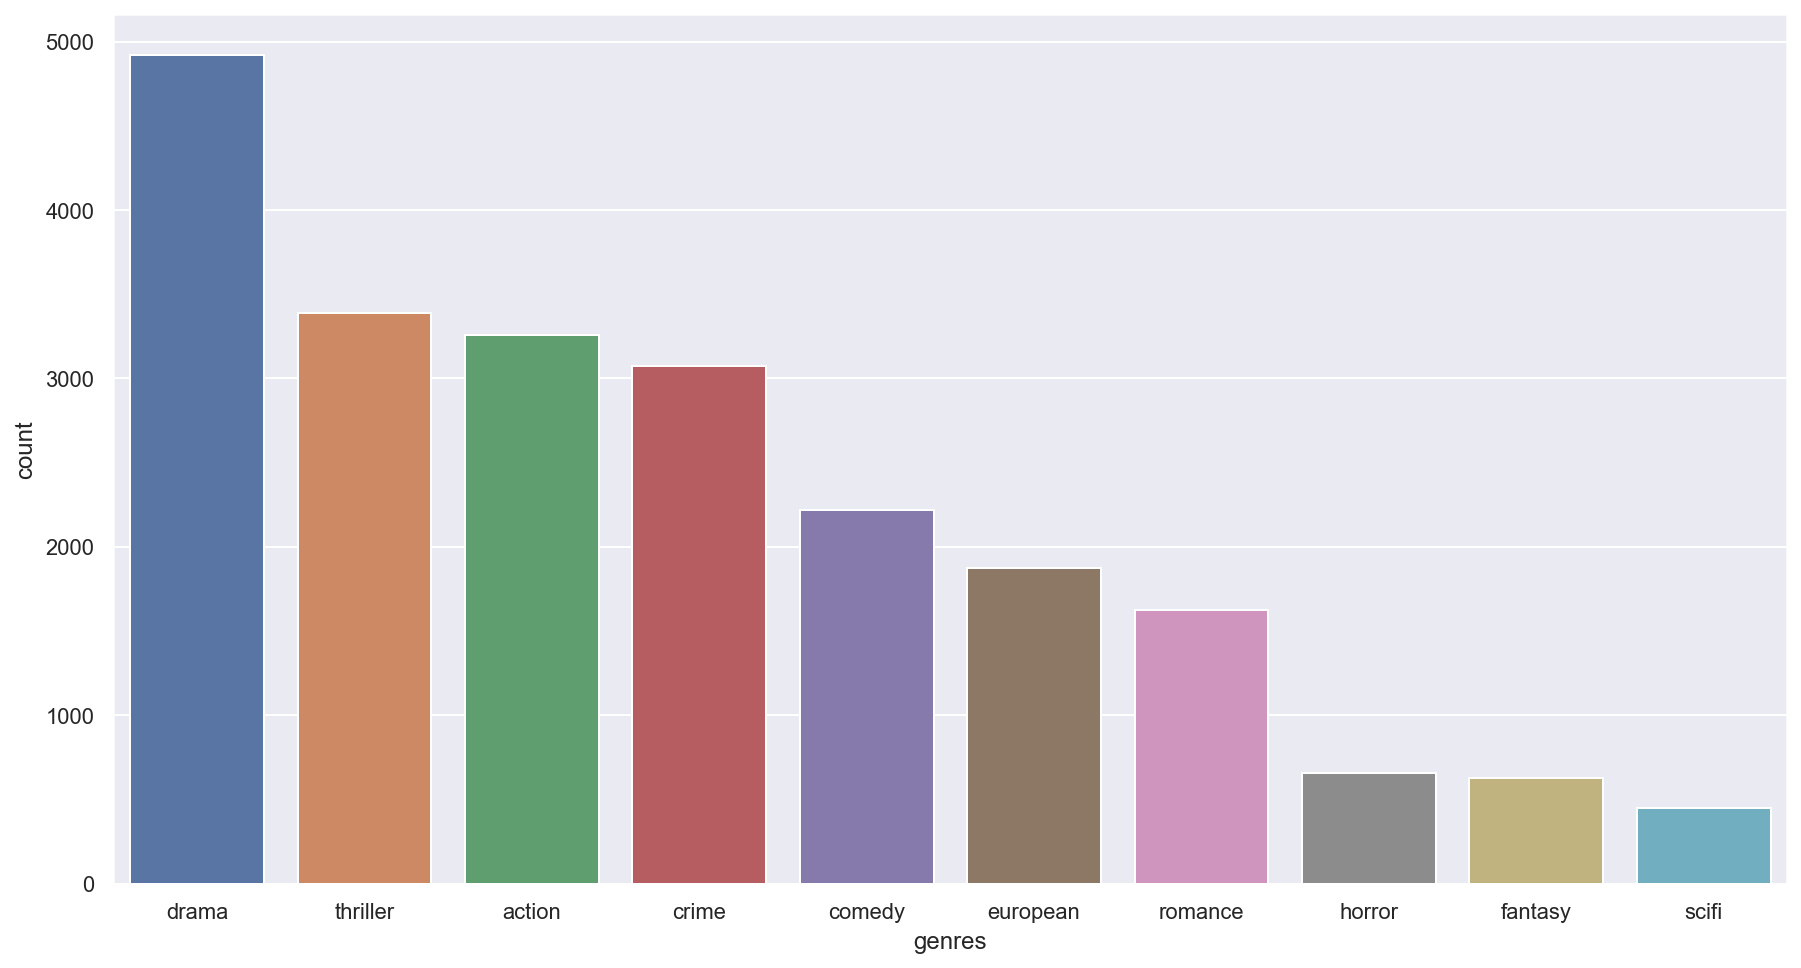

In [81]:
sns.barplot(data=genres, x="index", y='genres')
sns.set(rc = {'figure.figsize':(15,8)})
plt.xlabel("genres")
plt.ylabel("count")
plt.show()

#### country

In [78]:
country = movie2['production_countries'].value_counts()

In [79]:
country = pd.DataFrame(country).reset_index().head(10)
country

,index,production_countries
0,US,14590
1,GB,2579
2,CA,1434
3,IN,1248
4,DE,901
5,FR,643
6,CN,460
7,IT,433
8,JP,338
9,BE,293


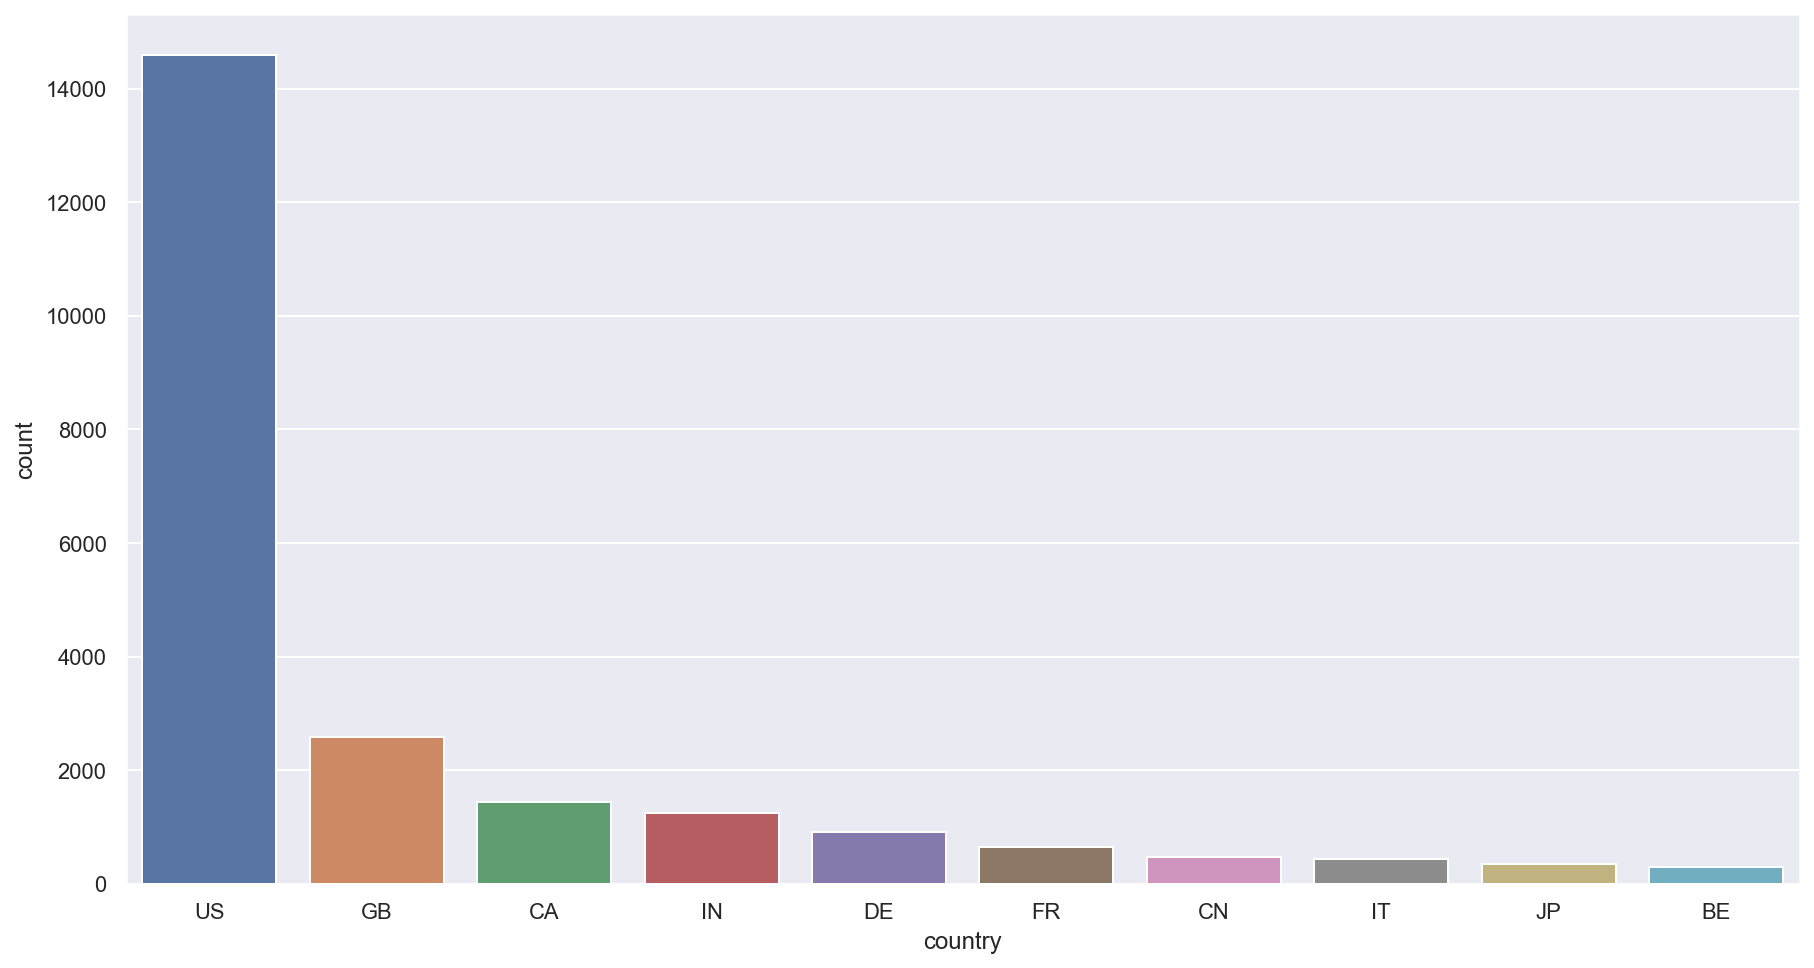

In [80]:
sns.barplot(data=country, x="index", y='production_countries')
sns.set(rc = {'figure.figsize':(15,8)})
plt.xlabel("country")
plt.ylabel("count")
plt.show()

### insight
넷플릭스에서 수많은 옛날 영화중 어떤 영화를 뽑은 것일까??

옛날 영화(1890년 ~ 2005년) 중 넷플릭스에 있는 영화의 평점은 데체적으로 높지 않을까? -평점이 낮으면 굳이 넷플릭스에서 안뽑지 않았을까?

In [82]:
M1 = movie2.drop_duplicates('Movie_Id')

In [83]:
# 넷플릭스 포함
M1 = M1[['Movie_Id', 'rating']]

In [84]:
# 넷플릭스에 없는 영화
M2 = movie[['Movie_Id', 'rating']]

In [85]:
M2 = M2.append(M1)

C:\Users\lhj\AppData\Local\Temp\ipykernel_22284\2397389482.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  M2 = M2.append(M1)


In [86]:
M2 = M2.drop_duplicates(['Movie_Id'], keep = False)

In [87]:
M1.mean()

Movie_Id    9006.123457
rating         3.385742
dtype: float64

In [88]:
M2.mean()

Movie_Id    8883.522243
rating         3.226880
dtype: float64

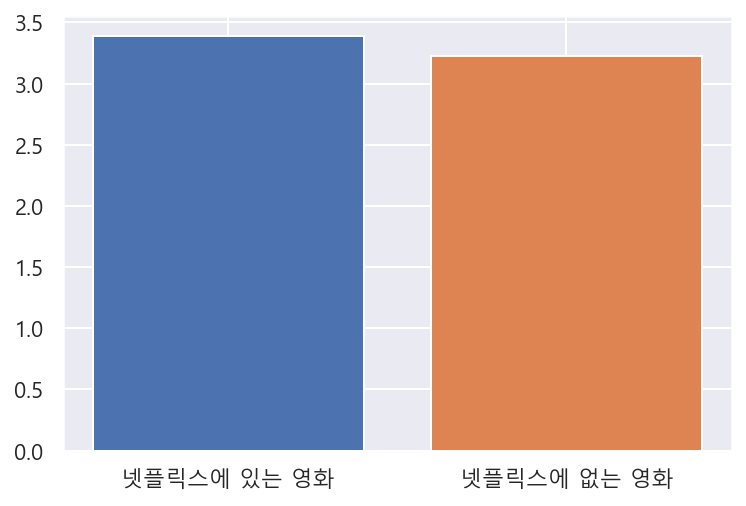

In [91]:
#시각화
b1 =plt.bar('넷플릭스에 있는 영화', M1[['rating']].mean())
b2 =plt.bar('넷플릭스에 없는 영화', M2[['rating']].mean())

넷플릭스에 있는 영화가 평점이 조금 더 높지만 그 차이가 거의 없다.
어떤 이유에서 넷플릭스는 옛날 영화를 뽑은 것일까?

### 상관관계 확인

In [112]:
movie2.columns

Index(['Movie_Id', 'rating', 'Year', 'Name', 'Movie_count', 'id', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'imdb_score', 'person_id', 'name', 'character',
       'role', 'age', 'Actor', 'genre', 'production_countrie'],
      dtype='object')

In [173]:
m2 = movie2[['rating', 'Movie_count', 'release_year', 'runtime','age', 'genre', 'production_countrie']]

In [174]:
m3 = movie2[['imdb_score', 'Movie_count', 'release_year', 'runtime','age', 'genre', 'production_countrie']]

In [175]:
m2 = m2.drop_duplicates()
m3 = m3.drop_duplicates()

<AxesSubplot:title={'center':'rating 상관관계'}>

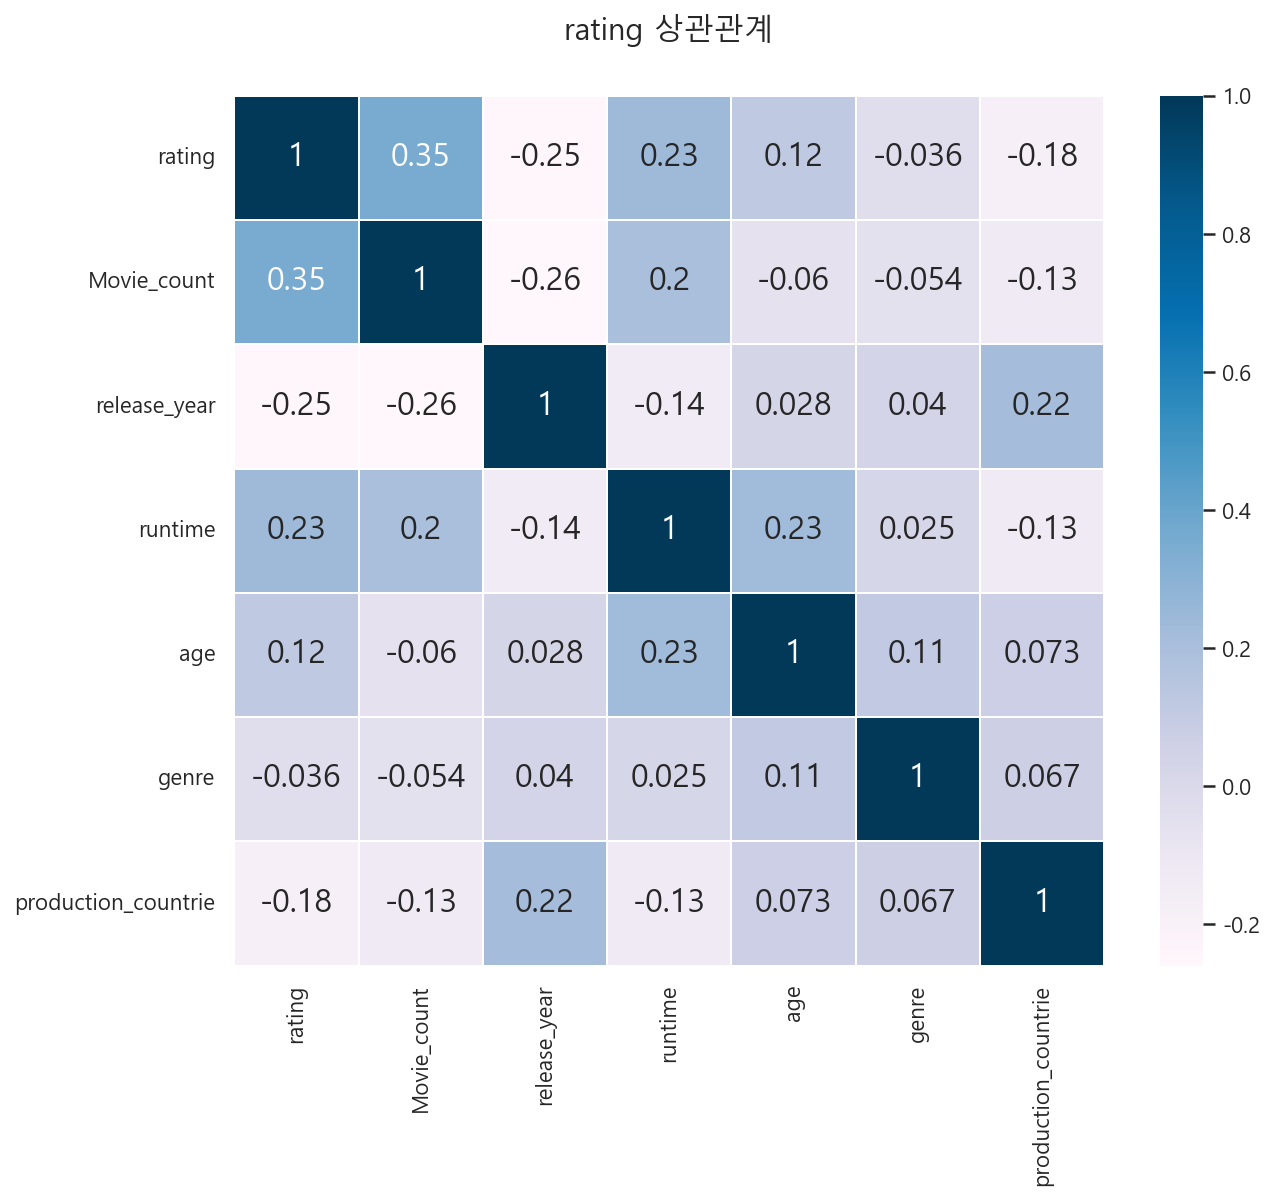

In [176]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("rating 상관관계", y = 1.05, size = 15)
sns.heatmap(m2.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

<AxesSubplot:title={'center':'imdb_score 상관관계'}>

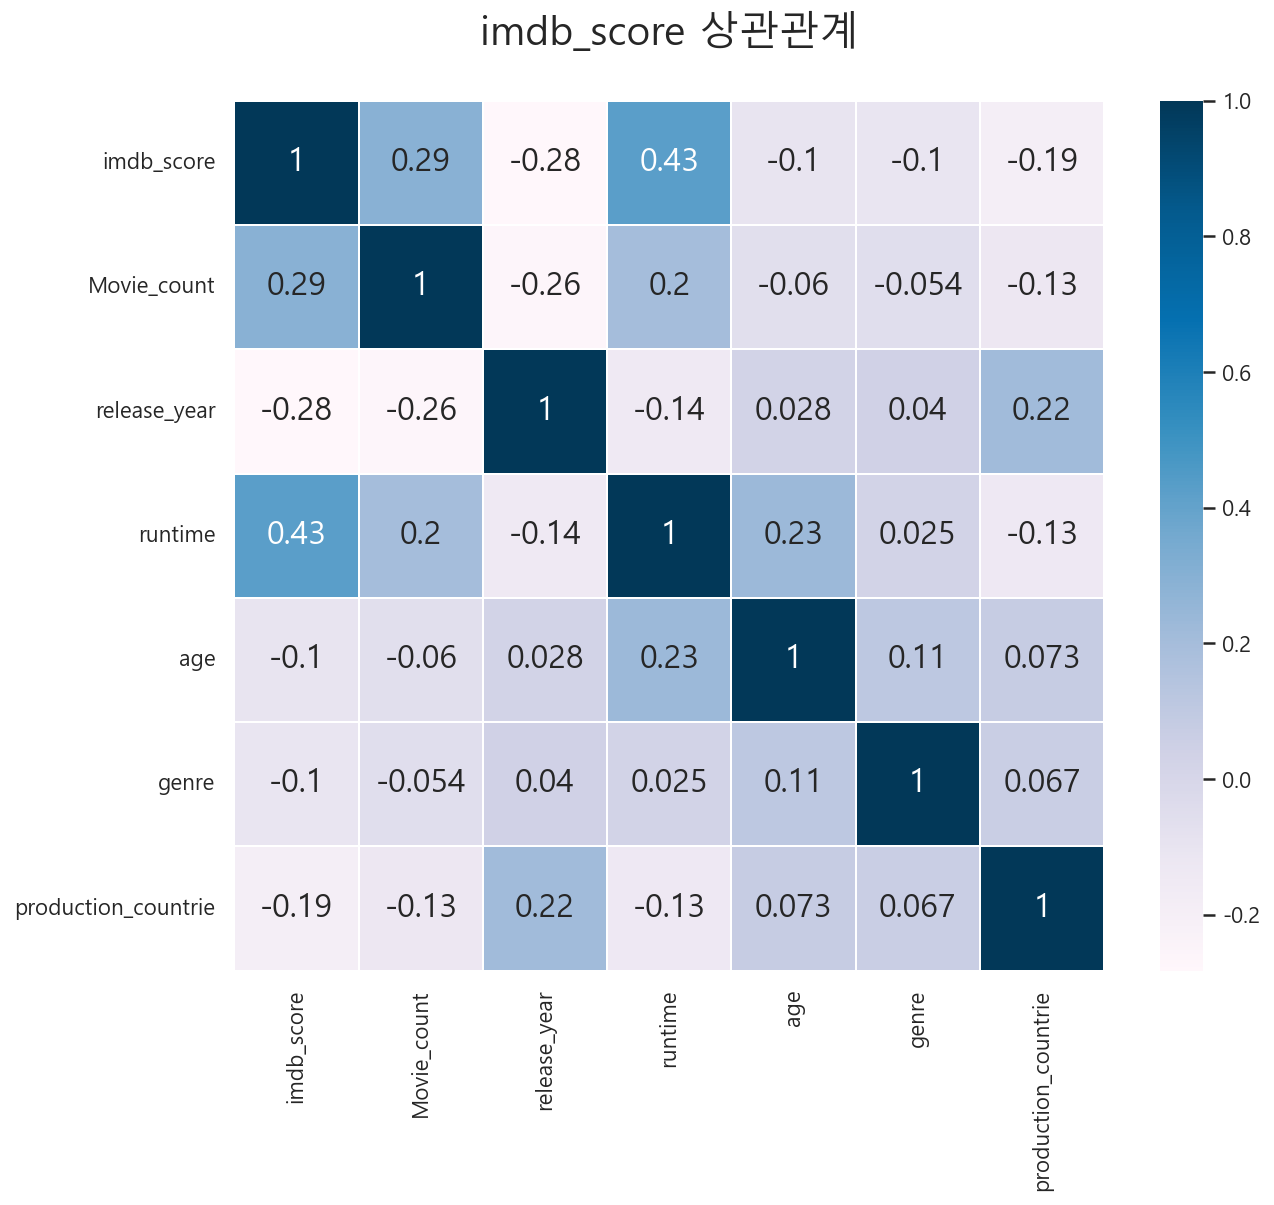

In [177]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("imdb_score 상관관계", y = 1.05, size = 20)
sns.heatmap(m3.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

* 넷플릭스 중 옛날 영화의 상관관계를 확인해 주었다.

1. rating과 imdb 의 상관관계에 큰 차이가 없는 것으로 확인됨, rating의 데이터가 충분한 신뢰성이 있다고 판단할수 있다.
2. 평점과 가장 큰 상관관계는 영화 평점 수이다. 

---

평점 상위 10개의 상관관계만 확인해 줘보자!

In [167]:
m4 = m2.sort_values('rating', ascending = False).head(20)

In [168]:
m4.corr()

,rating,Movie_count,release_year,runtime,age,genre
rating,1.000000,-0.068547,0.527079,0.014560,-0.175074,0.294992
Movie_count,-0.068547,1.000000,-0.396931,-0.368825,-0.299235,0.044940
release_year,0.527079,-0.396931,1.000000,0.439773,0.248327,0.248599
runtime,0.014560,-0.368825,0.439773,1.000000,0.623455,0.046571
age,-0.175074,-0.299235,0.248327,0.623455,1.000000,-0.078246
genre,0.294992,0.044940,0.248599,0.046571,-0.078246,1.000000


<AxesSubplot:title={'center':'평점 상위 10개'}>

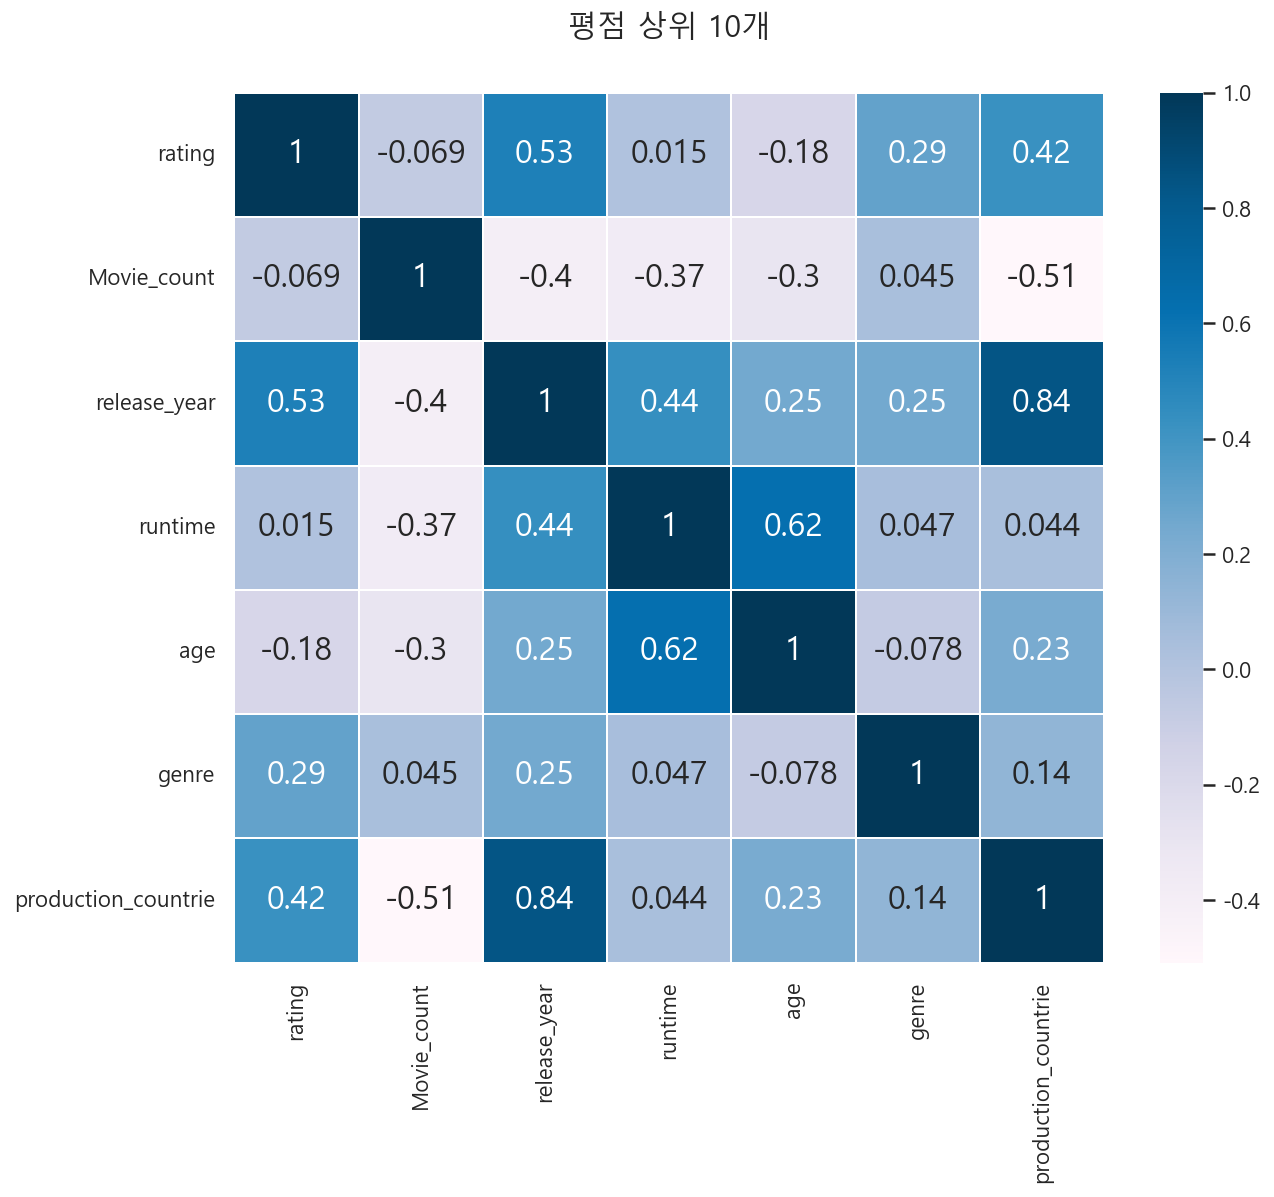

In [169]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("평점 상위 10개", y = 1.05, size = 15)
sns.heatmap(m4.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [159]:
m5 = m2.sort_values('rating', ascending = False).tail(20)

<AxesSubplot:title={'center':'평점 하위 10개'}>

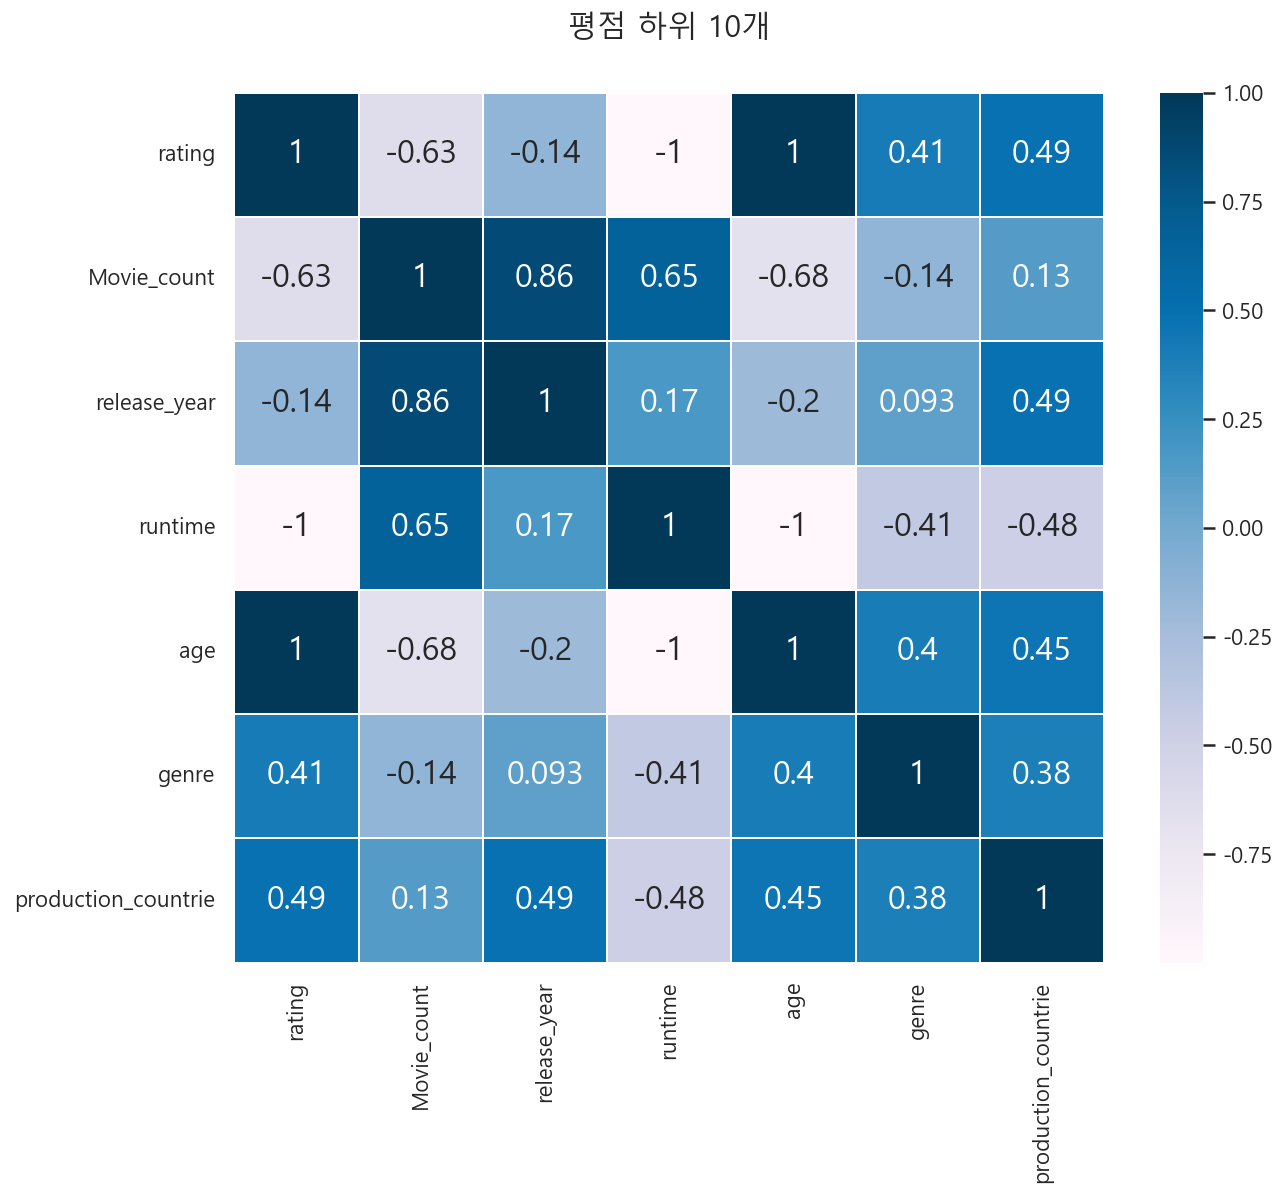

In [170]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("평점 하위 10개", y = 1.05, size = 15)
sns.heatmap(m5.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

* 상위, 하위 10개의 영화 확인

확인 결과 

상위 10개의 영화에서는 평점이 제작 년도와 제작한 국가의 상관관계가 높았다.  또한 제작 년도와 제작한 국가의 상관관계가 높게 나온 것을 확인 할 수 있다.

하위 10개의 영화에서는 평점이 장르와 제작한 국가와의 상관관계가 높은 것으로 나왔다. 

이런 특이한 상황을 더욱 자세히 분석 해 볼 필요가 있다.

---

# 4. 추가로 해줄 것

### insight
넷플릭스의 상위 평점 감독 10명 보기

### insight
연령별 평점 차이? 확인
연도별 평점 확인

### insight
넷플릭스와 평점데이터의 중복된 데이터만 확인하는 것이 아닌, 넷플릭스에 있는 전체 데이터를 가지고 확인

In [178]:
#더 많은 시도 계속해서 진행 할 것.